### The New system equations are (w/o steering angle):  
θ(t) = θ(t-Δt) + Δθ(t)  
x(t) = x(t-Δt) + v * cos(θ(t)) * Δt  
y(t) = y(t-Δt) + v * sin(θ(t)) * Δt  


& Values of x(t=0), y(t=0) and θ(t=0) are definite/constants and are given. For simplicity, let's assume x(t=0), y(t=0) and θ(t=0) to be 0 while the vehicle is moving with a constant speed of 1.    
$ Assuming value of Δθ(t) to be derived from Gaussian(0, 1).  

# Simple KDE trial for estimating the distribution of Δθ(t) at t+1; when Δθ(t) at t is sampled from Gaussian (0, 1). 

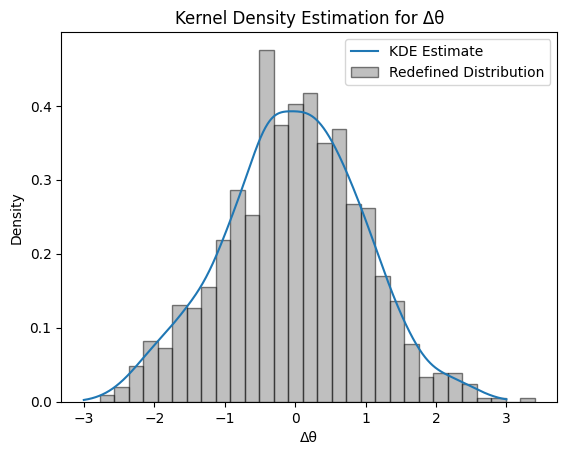

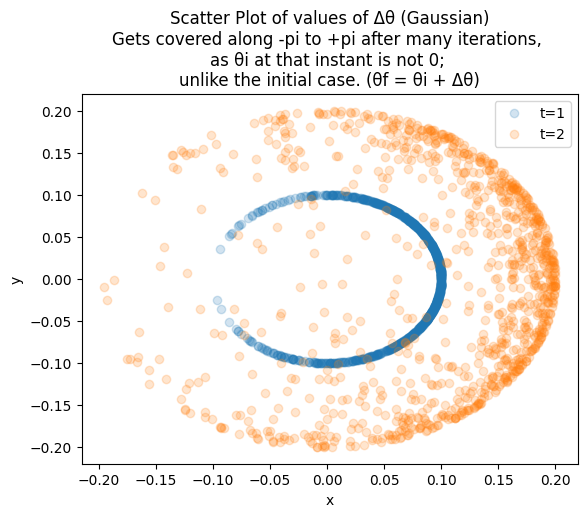

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Initialize system parameters
x, y, theta = 0.0, 0.0, 0.0
v = 1.0
delta_t = 0.1  # Time step
n_samples = 1000  # Number of samples

# Step 1: Sample initial Δθ from N(0, 1) for t=1
delta_theta_t1 = np.random.normal(0, 1, n_samples)

# Step 2: Calculate x(t), y(t), θ(t) for t=1
theta_t1 = theta + delta_theta_t1
x_t1 = x + v * np.cos(theta_t1) * delta_t
y_t1 = y + v * np.sin(theta_t1) * delta_t

# Step 3: Use KDE to refine the distribution of Δθ
kde = gaussian_kde(delta_theta_t1)
delta_theta_refined = kde.resample(n_samples)[0]

# Visualize the KDE
x_range = np.linspace(-3, 3, 1000)
kde_values = kde(x_range)

plt.plot(x_range, kde_values, label='KDE Estimate')
plt.hist(delta_theta_t1, bins=30, density=True, alpha=0.5, color='gray', edgecolor='black', label='Redefined Distribution')
plt.title('Kernel Density Estimation for Δθ')
plt.xlabel('Δθ')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 4: Sample Δθ for t=2 from the refined distribution
delta_theta_t2 = kde.resample(n_samples)[0]

# Calculate x(t), y(t), θ(t) for t=2 using the refined Δθ
theta_t2 = theta_t1 + delta_theta_t2
x_t2 = x_t1 + v * np.cos(theta_t2) * delta_t
y_t2 = y_t1 + v * np.sin(theta_t2) * delta_t

# Optionally, visualize the trajectory
plt.plot(x_t1, y_t1, 'o', alpha=0.2, label='t=1')
plt.plot(x_t2, y_t2, 'o', alpha=0.2, label='t=2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of values of Δθ (Gaussian)\nGets covered along -pi to +pi after many iterations, \nas θi at that instant is not 0; \nunlike the initial case. (θf = θi + Δθ)')
plt.legend()
plt.show()




# Gaussian when considered multiple time stamps

[ 5.60373978e+00  1.04719131e+01  8.70508947e+00  1.25500595e-01
  7.22407758e+00  6.27094015e+00  1.76163944e+00  5.82045194e+00
  1.52072299e+01  8.01724134e+00  9.81679754e+00  1.01195927e+01
  8.03956219e+00  8.85501066e+00  5.02925670e+00  7.47634177e+00
  1.06939291e+01  7.39994913e+00  1.02112552e+01  1.39223061e+01
  7.64725442e+00  6.43471774e+00  8.83182088e+00  7.03295186e+00
  9.58034931e+00  7.02437324e+00  9.90470627e+00  7.19367118e+00
  1.23727869e+01  5.57176083e+00  1.20771234e+01  2.27909886e+00
  8.47000915e+00  1.38440494e+01  8.28795340e+00  7.48901210e+00
  1.27084564e+01  8.17381174e+00  9.68290075e+00  6.58215530e+00
  1.52034268e+01  6.82311792e+00  1.59771655e+00  6.06519159e+00
  1.27236960e+01  7.61285185e+00  7.23713317e+00  2.26505604e+01
  8.84448679e+00  7.35176534e+00  1.10722116e+01  1.06861391e+01
  1.25952165e+01  3.39506204e+00  8.71964496e-01  6.11009485e+00
  8.18971012e+00  6.78434315e-01  1.30439499e+01  5.89620284e+00
  2.05448372e+00  1.22382

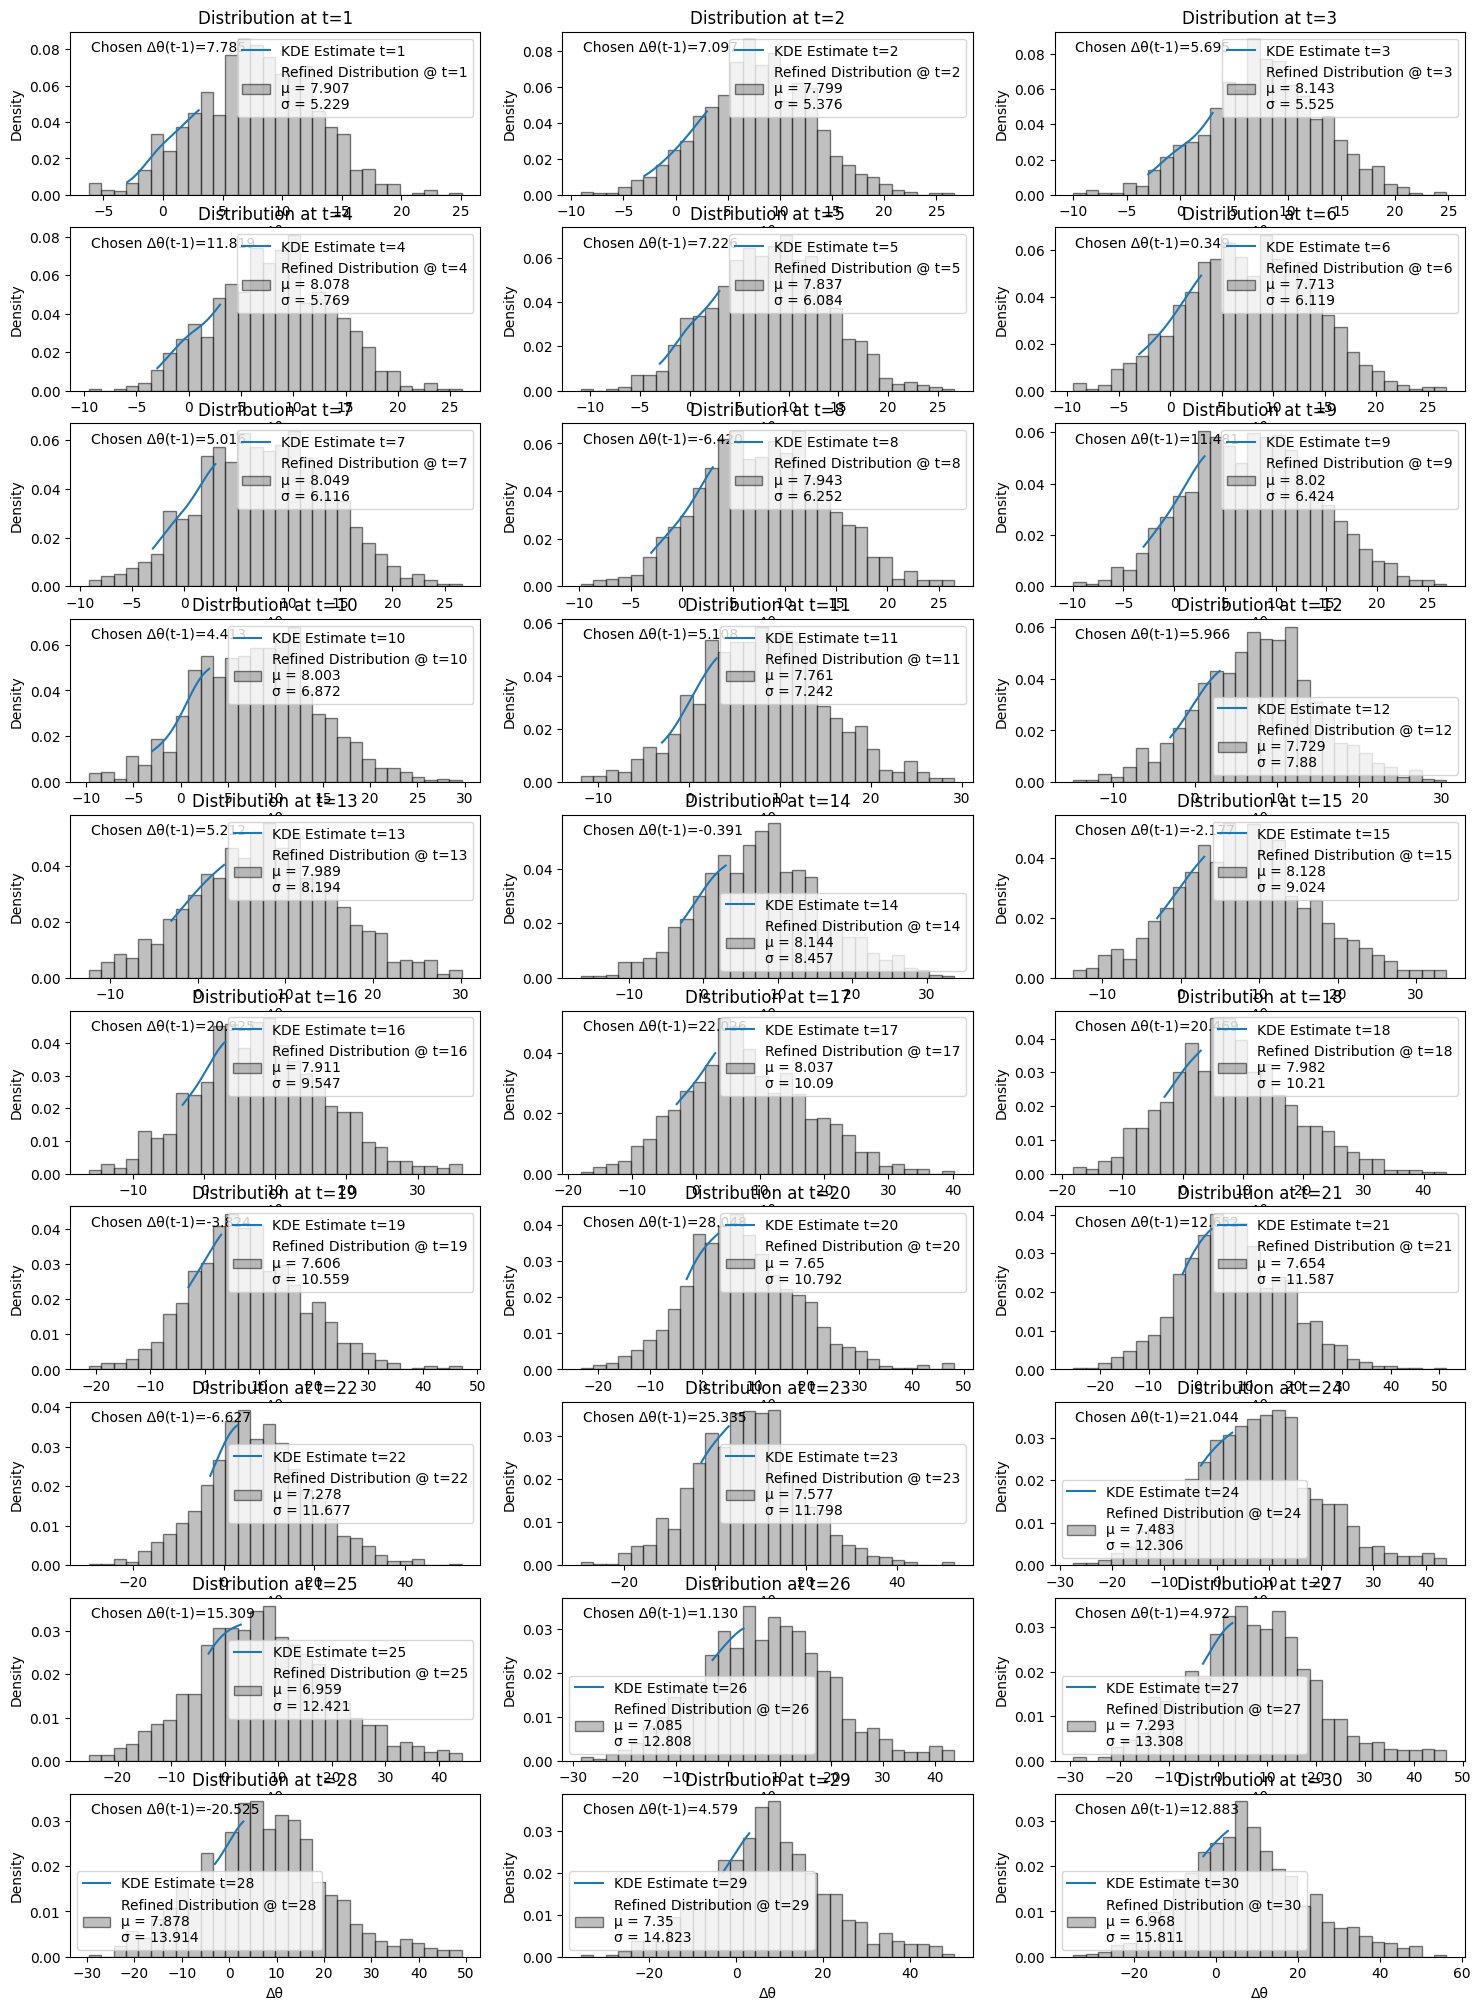

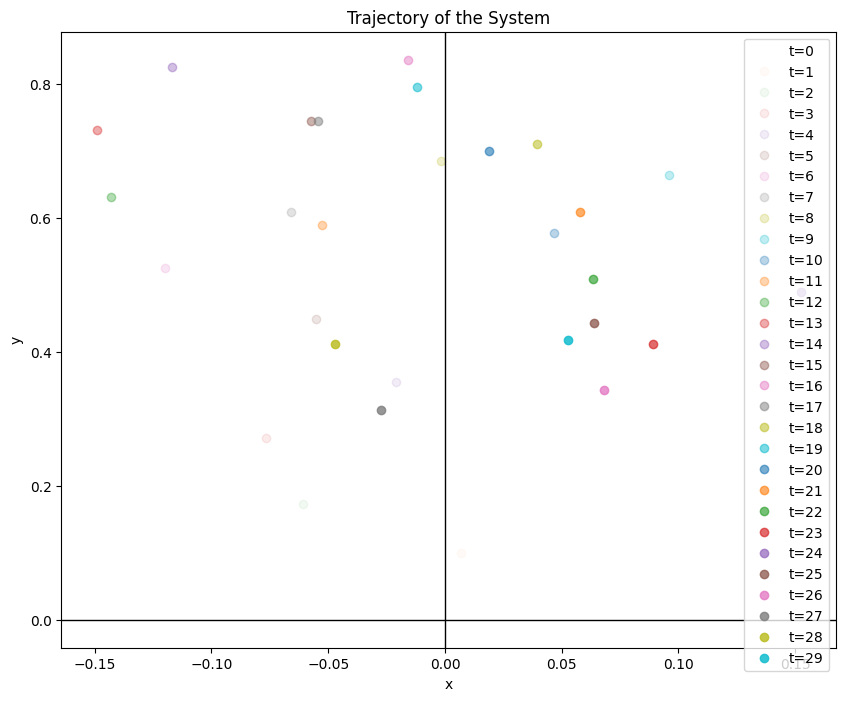

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Initialize system parameters
x, y, theta = 0.0, 0.0, 0.0
v = 1.0
delta_t = 0.1  # Time step
n_samples = 1000  # Number of samples

# Set number of time steps
num_time_steps = 30

# Arrays to store trajectories
x_trajectory = [x]
y_trajectory = [y]
theta_trajectory = [theta]

# Arrays to store distributions
distributions = []
chosen_delta_theta_values = []

# Initial sample of Δθ from N(0, 1)
delta_theta = np.random.normal(8, 5, n_samples)
distributions.append(delta_theta)

# Plot initial distribution
plt.figure(figsize=(18, 25))

for t in range(1, num_time_steps + 1):
    # Randomly choose a delta_theta for this iteration
    chosen_delta_theta = np.random.choice(delta_theta)
    chosen_delta_theta_values.append(chosen_delta_theta)

    # Update θ(t), x(t), y(t) using the current Δθ
    # theta = theta_trajectory[-1] + delta_theta
    # Above theta was an array, below it is a no.
    theta = theta_trajectory[-1] + chosen_delta_theta
    # Update θ(t), x(t), y(t) using the current Δθ
    x = x_trajectory[-1] + v * np.cos(theta) * delta_t
    y = y_trajectory[-1] + v * np.sin(theta) * delta_t

    # Store updated values
    theta_trajectory.append(theta)
    x_trajectory.append(x)
    y_trajectory.append(y)

    # Use KDE to refine the distribution of Δθ
    kde = gaussian_kde(delta_theta)
    delta_theta = kde.resample(n_samples)[0]
    distributions.append(delta_theta)

    # Plot KDE and samples
    plt.subplot(10, 3, t)
    x_range = np.linspace(-3, 3, 1000)
    kde_values = kde(x_range)
    plt.plot(x_range, kde_values, label=f'KDE Estimate t={t}')
    plt.hist(distributions[t-1], bins=30, density=True, alpha=0.5, color='gray', edgecolor='black', label=f'Refined Distribution @ t={t}\nμ = {round(np.mean(delta_theta),3)}\nσ = {round(np.std(delta_theta),3)}')
    plt.title(f'Distribution at t={t}')
    plt.xlabel('Δθ')
    plt.ylabel('Density')
    plt.legend()
    plt.text(0.05, 0.95, f'Chosen Δθ(t-1)={chosen_delta_theta:.3f}', transform=plt.gca().transAxes, verticalalignment='top')

# Plot the final trajectory
plt.figure(figsize=(10, 8))
for t in range(num_time_steps):
    plt.plot(x_trajectory[t], y_trajectory[t], 'o', alpha=0.03*t, label=f't={t}')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title('Trajectory of the System')
plt.legend()
plt.show()


### Observation  
As the no. of iteration increases, the mean of the redefined distribution decreases (tends towards -ve axis).  
While the standarad deviation increases; resulting in the flattening of the graph.

# Initial Distribution as Uniform (-pi/3, +pi/3)

[-0.63284879 -0.42760149 -0.59860347 -0.55551193 -1.0043541   0.01151175
  0.24371291 -0.53188534 -0.82431744  0.32927688 -0.81652813  1.03870937
  0.99852737 -0.15089823 -0.34697567  0.40770351 -0.80614948 -0.19906364
  0.63033655  0.00238574  0.70400939  0.40333037 -0.56873065 -0.16524962
  0.82445305  0.42532102  0.55897973 -0.35536646  0.04996256  0.54981749
  0.05782213 -0.78069477 -0.64361997 -0.12408375 -0.93531636 -0.56870165
  0.36162865  0.6211067  -0.55181384  0.22694875 -0.64756853 -0.31263691
  0.69180416  0.47733176  0.39529377 -0.6833627  -0.4406253   0.2491336
  0.29595066  0.14258954  0.30531288 -0.89169765  0.82698499  0.92743944
  0.69061017 -0.26510119 -0.81767886  0.70459806 -0.25386295 -0.0640232
 -0.06929265 -0.96543648  1.0160352   0.81811447  0.18499204 -0.17379556
  0.15217252  0.33043654  0.5437426   0.45726268 -0.15388238  0.04595001
 -0.62495927 -0.8094383  -0.08427657  0.43267092  0.53244968 -0.37407833
  0.11186763 -0.88997803 -0.91216844 -0.45784961 -0.2

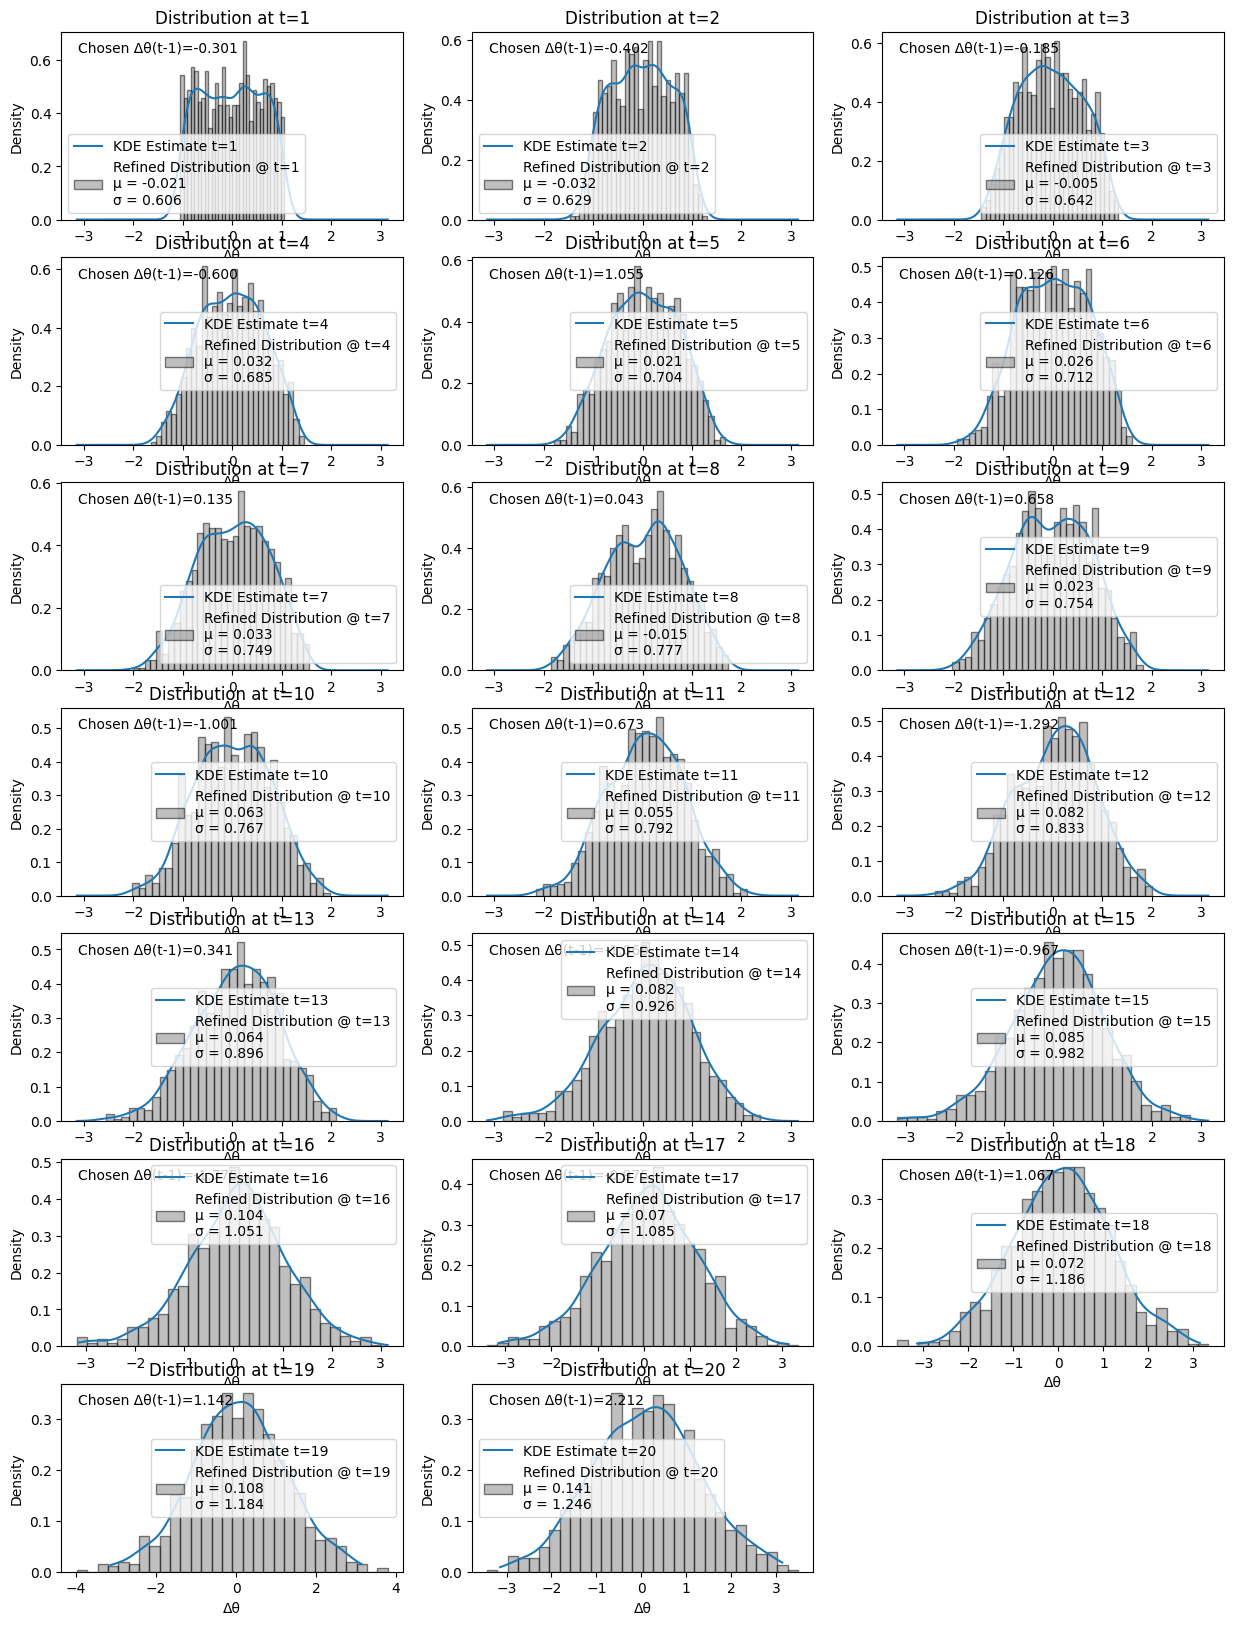

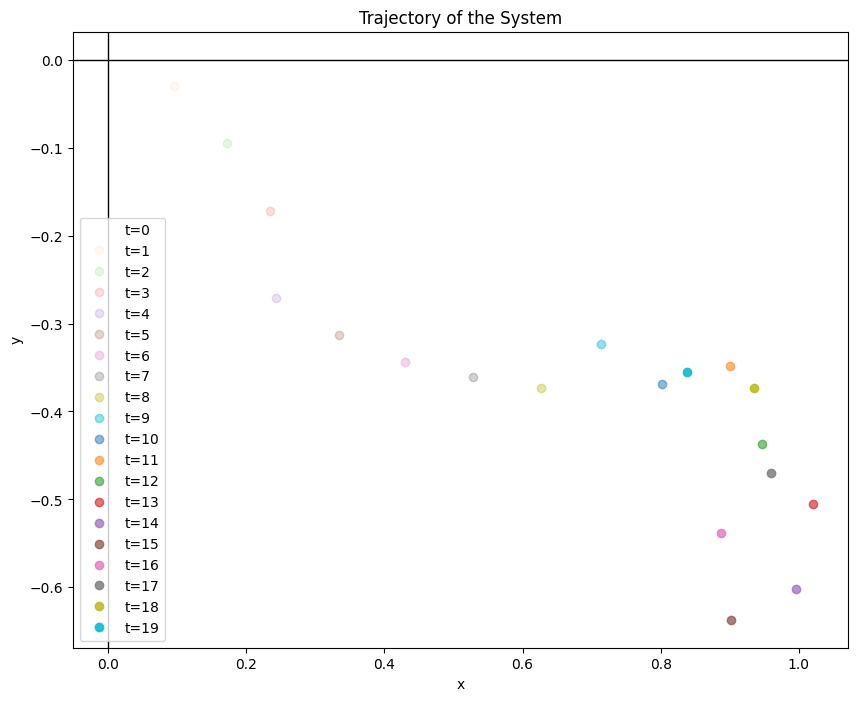

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Initialize system parameters
x, y, theta = 0.0, 0.0, 0.0
v = 1.0
delta_t = 0.1  # Time step
n_samples = 1000  # Number of samples

# Set number of time steps
num_time_steps = 20

# Arrays to store trajectories
x_trajectory = [x]
y_trajectory = [y]
theta_trajectory = [theta]

# Arrays to store distributions and chosen delta_theta values
distributions = []
chosen_delta_theta_values = []

# Initial sample of Δθ from a uniform distribution
delta_theta = np.random.uniform(-np.pi/3, np.pi/3, n_samples)
# print (delta_theta)
distributions.append(delta_theta)

# Plot initial distribution
plt.figure(figsize=(15, 20))

for t in range(1, num_time_steps + 1):
    # Randomly choose a delta_theta for this iteration
    chosen_delta_theta = np.random.choice(delta_theta)
    chosen_delta_theta_values.append(chosen_delta_theta)
    
    # Update θ(t), x(t), y(t) using the current Δθ
    theta = theta_trajectory[-1] + chosen_delta_theta
    x = x_trajectory[-1] + v * np.cos(theta) * delta_t
    y = y_trajectory[-1] + v * np.sin(theta) * delta_t

    # Store updated values
    theta_trajectory.append(theta)
    x_trajectory.append(x)
    y_trajectory.append(y)

    # Use KDE to refine the distribution of Δθ
    kde = gaussian_kde(delta_theta)
    delta_theta = kde.resample(n_samples)[0]
    distributions.append(delta_theta)

    # Plot KDE and samples
    plt.subplot(7, 3, t)
    x_range = np.linspace(-np.pi, np.pi, 1000)
    kde_values = kde(x_range)
    plt.plot(x_range, kde_values, label=f'KDE Estimate t={t}')
    plt.hist(distributions[t-1], bins=30, density=True, alpha=0.5, color='gray', edgecolor='black', label=f'Refined Distribution @ t={t}\nμ = {round(np.mean(delta_theta),3)}\nσ = {round(np.std(delta_theta),3)}')
    plt.title(f'Distribution at t={t}')
    plt.xlabel('Δθ')
    plt.ylabel('Density')
    plt.legend()
    plt.text(0.05, 0.95, f'Chosen Δθ(t-1)={chosen_delta_theta:.3f}', transform=plt.gca().transAxes, verticalalignment='top')

# Plot the final trajectory
plt.figure(figsize=(10, 8))
for t in range(num_time_steps):
    plt.plot(x_trajectory[t], y_trajectory[t], 'o', alpha=0.05*t, label=f't={t}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the System')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.show()



# Initial Distribution as Triangular Distribution  
a, b, c = 3, 26, 27  # Triangular distribution parameters (left, mode, right)

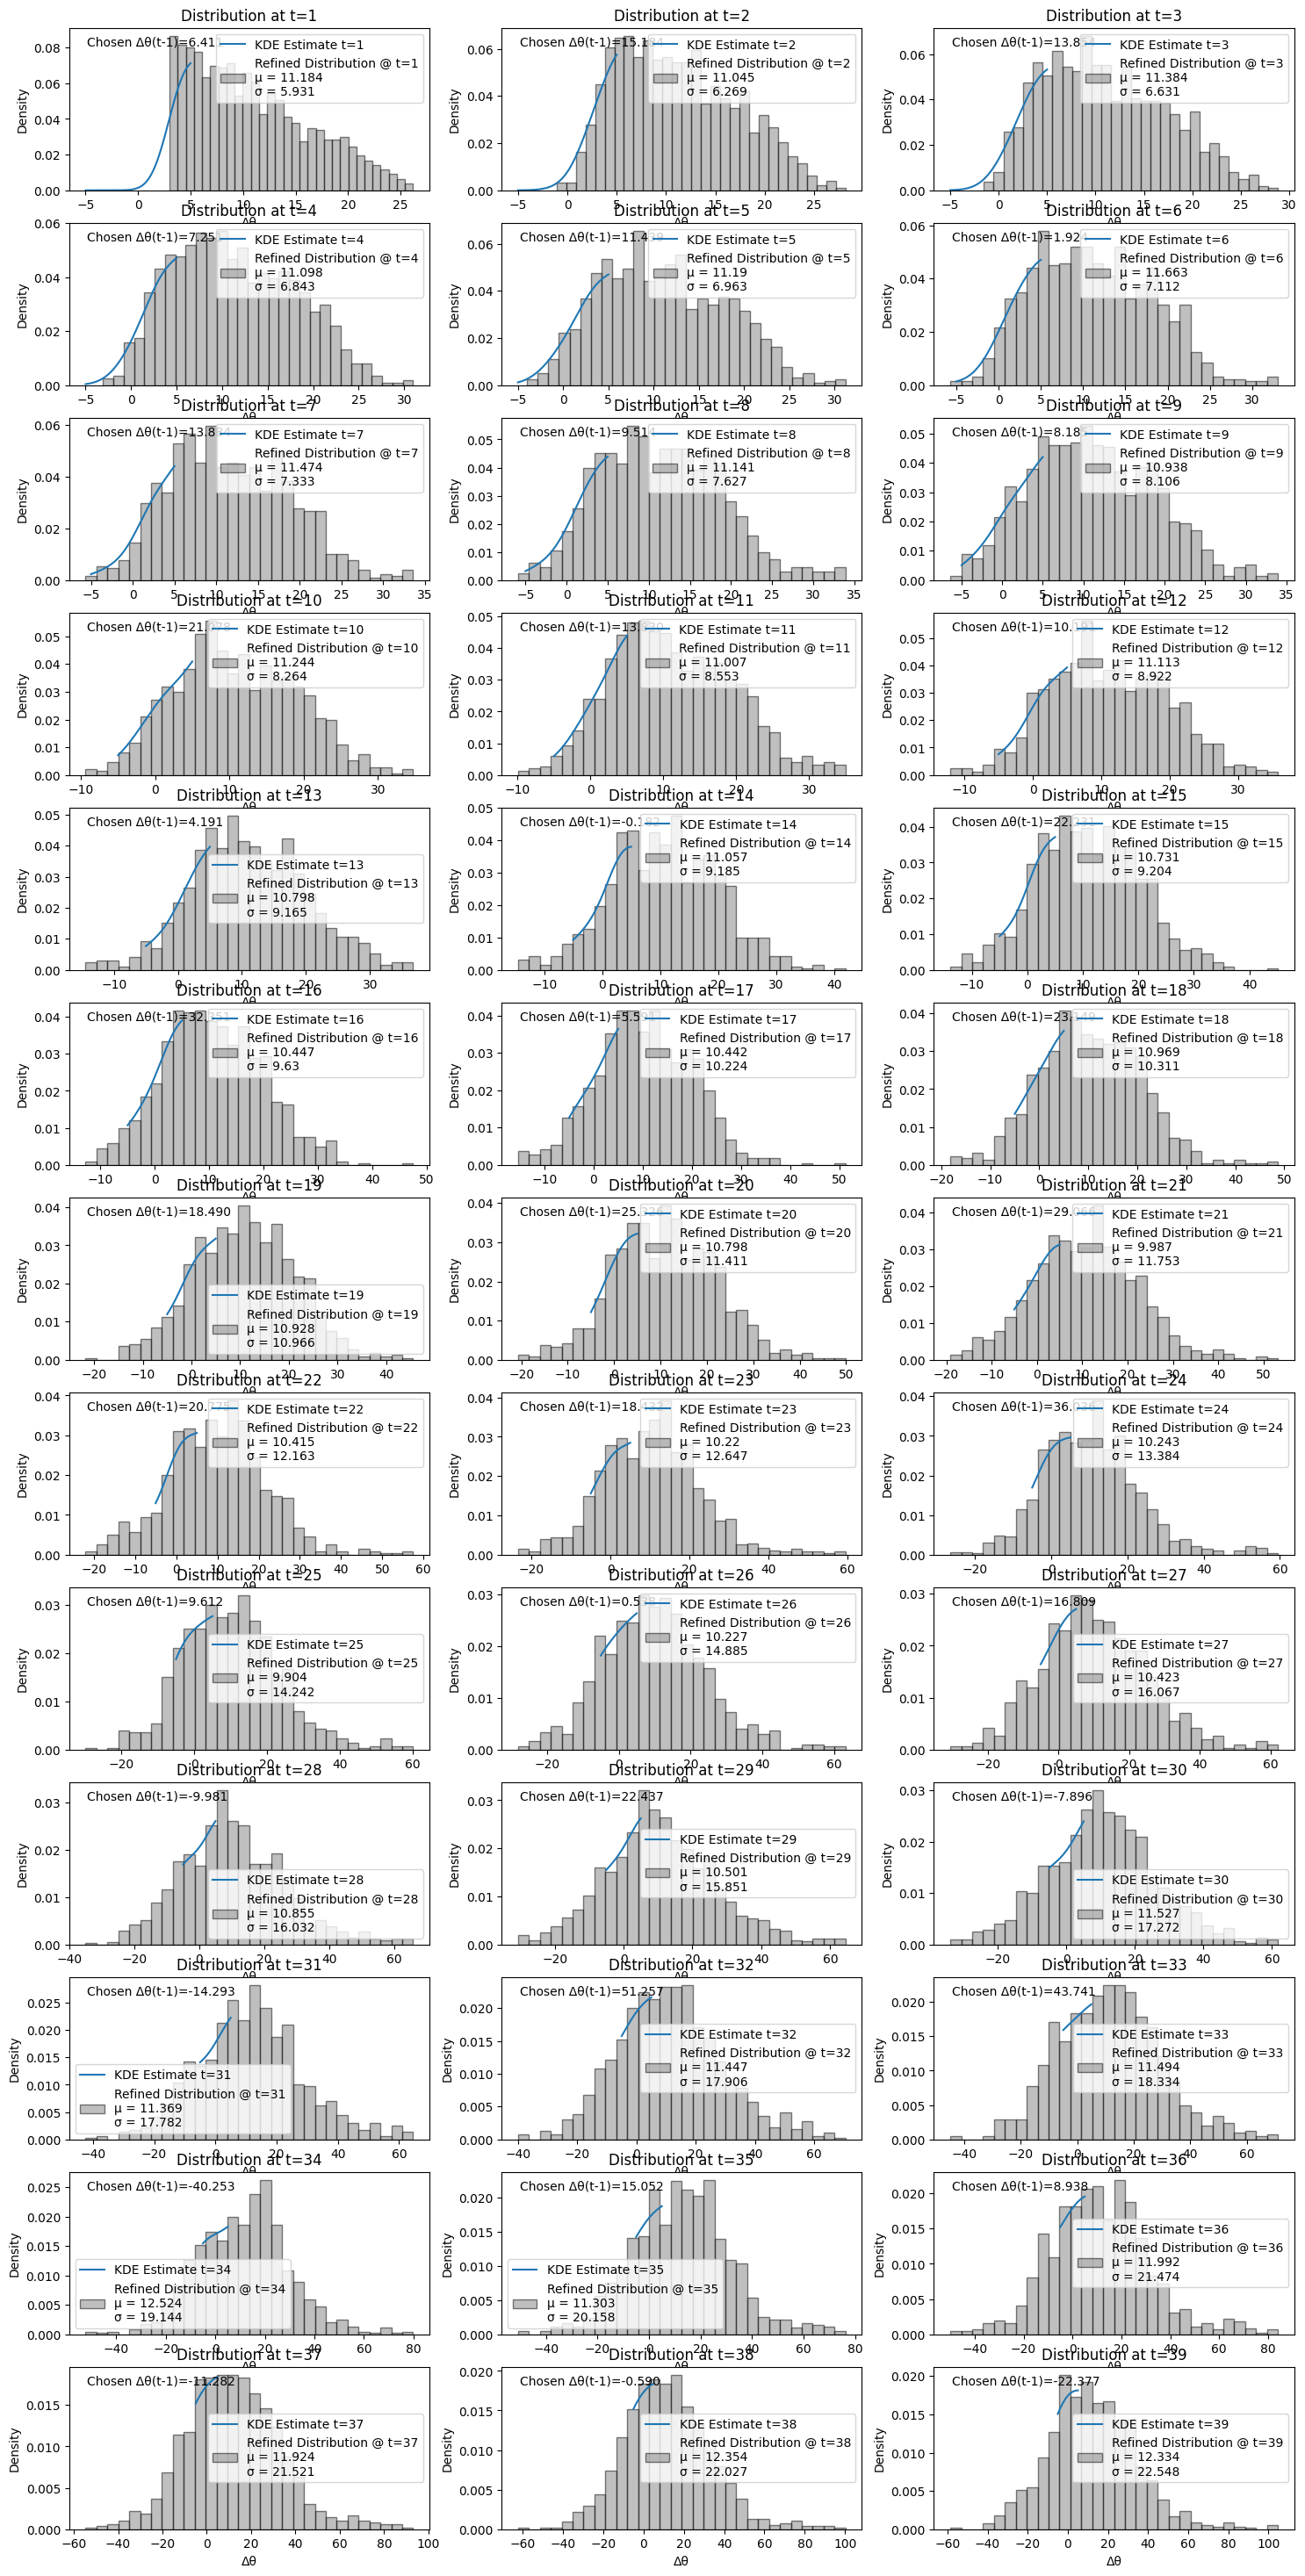

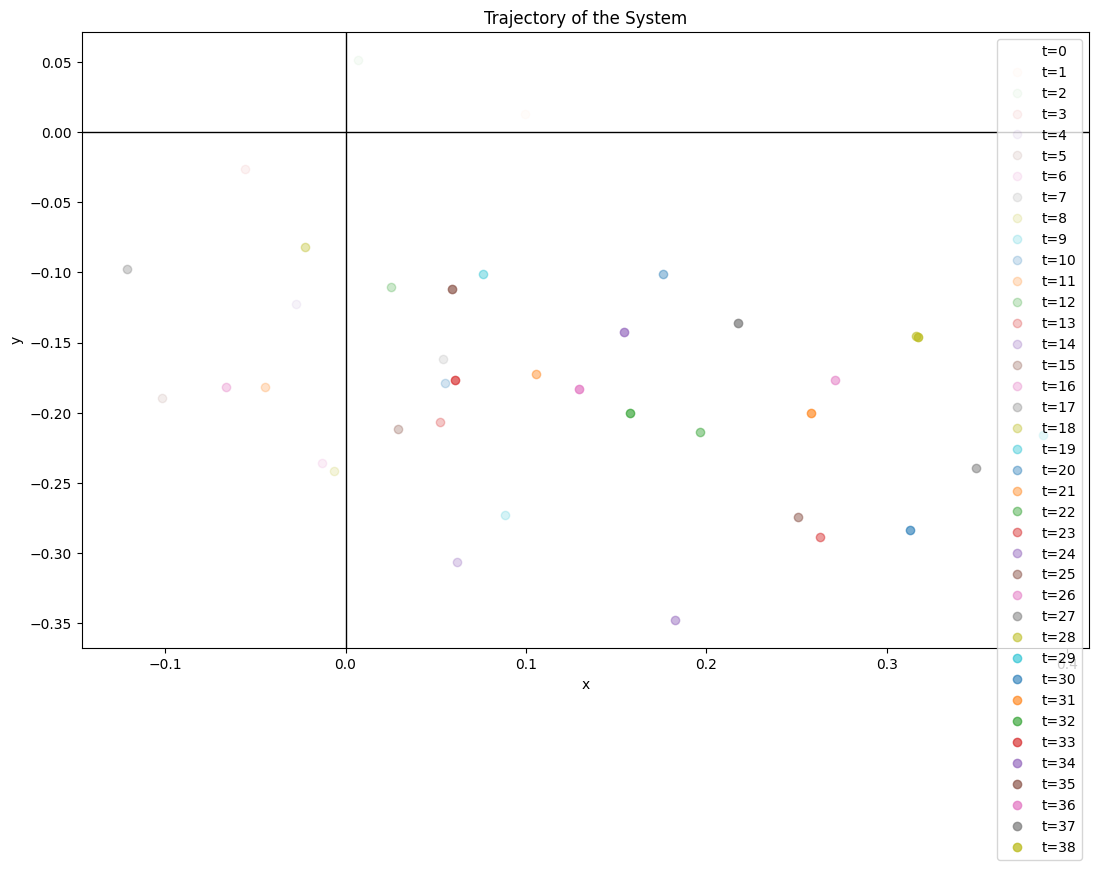

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, triang

# Initialize system parameters
x, y, theta = 0.0, 0.0, 0.0
v = 1.0
delta_t = 0.1  # Time step
n_samples = 1000  # Number of samples

# Set number of time steps
num_time_steps = 39

# Arrays to store trajectories
x_trajectory = [x]
y_trajectory = [y]
theta_trajectory = [theta]

# Arrays to store distributions
distributions = []
chosen_delta_theta_values = []

# Initial sample of Δθ from a triangular distribution
a, b, c = 3, 3, 27  # Triangular distribution parameters (left, mode, right)
delta_theta = np.random.triangular(a, b, c, n_samples)
distributions.append(delta_theta)

# Plot initial distribution
plt.figure(figsize=(18, 37))

for t in range(1, num_time_steps + 1):
    # Randomly choose a delta_theta for this iteration
    chosen_delta_theta = np.random.choice(delta_theta)
    chosen_delta_theta_values.append(chosen_delta_theta)

    # Update θ(t), x(t), y(t) using the current Δθ
    # theta = theta_trajectory[-1] + delta_theta
    # Above theta was an array, below it is a no.
    theta = theta_trajectory[-1] + chosen_delta_theta
    x = x_trajectory[-1] + v * np.cos(theta) * delta_t
    y = y_trajectory[-1] + v * np.sin(theta) * delta_t

    # Store updated values
    theta_trajectory.append(theta)
    x_trajectory.append(x)
    y_trajectory.append(y)

    # Use KDE to refine the distribution of Δθ
    kde = gaussian_kde(delta_theta)
    delta_theta = kde.resample(n_samples)[0]
    distributions.append(delta_theta)

    # Plot KDE and samples
    plt.subplot(13, 3, t)
    x_range = np.linspace(-5, 5, 1000)
    kde_values = kde(x_range)
    plt.plot(x_range, kde_values, label=f'KDE Estimate t={t}')
    plt.hist(distributions[t-1], bins=30, density=True, alpha=0.5, color='gray', edgecolor='black', label=f'Refined Distribution @ t={t}\nμ = {round(np.mean(delta_theta),3)}\nσ = {round(np.std(delta_theta),3)}')
    plt.title(f'Distribution at t={t}')
    plt.xlabel('Δθ')
    plt.ylabel('Density')
    plt.legend()
    plt.text(0.05, 0.95, f'Chosen Δθ(t-1)={chosen_delta_theta:.3f}', transform=plt.gca().transAxes, verticalalignment='top')

# Plot the final trajectory
plt.figure(figsize=(13, 8))
for t in range(num_time_steps):
    plt.plot(x_trajectory[t], y_trajectory[t], 'o', alpha=0.02*t, label=f't={t}')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title('Trajectory of the System')
plt.legend()
plt.show()


# Observation  
Triangles shape is getting refined about the mode, though the mean remains similar.  
Scalene triangle to isoscles.  
Std. Dev increases a lot.